# NORMALIZATION

TO ELIMINATE THE UNIT AND BRING THE VALUE TO COMMON SCALE

## Min max scaling
## Mean Normalization
## mean absolue
## robust

1- min max-
(Xi-Xmin)/(Xmax-Xmin)
###   range coverted to (0-1)

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('wine_data-Copy1.csv',header=None,usecols=[0,1,2],names=['class label','Alcohol',"Malic acid"])

In [5]:
df.head()

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

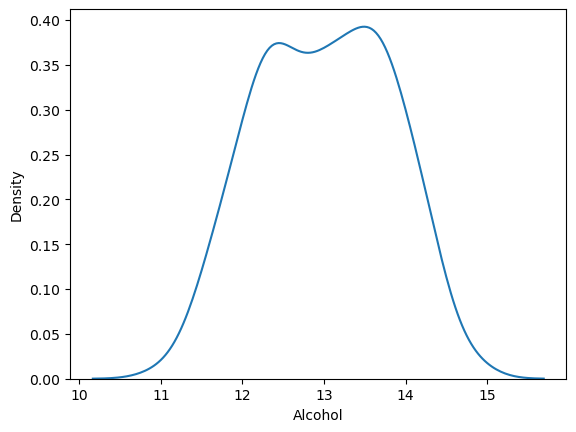

In [6]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

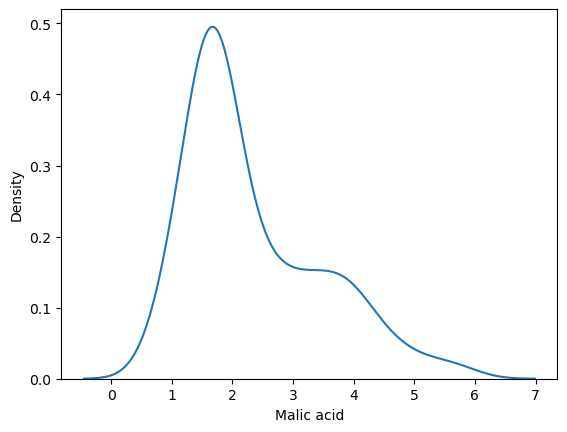

In [7]:
sns.kdeplot(df['Malic acid'])

C:\Users\prince\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

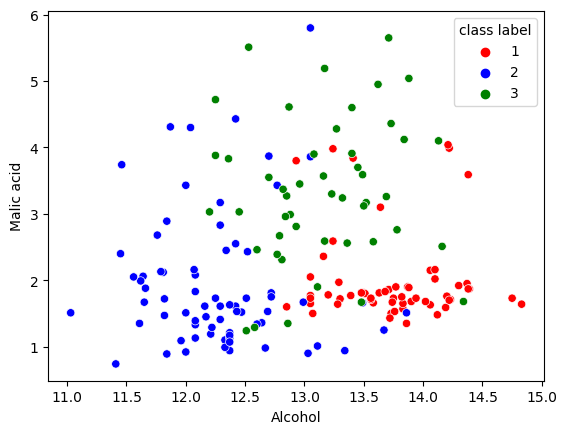

In [9]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'],hue=df['class label'],palette=color_dict)

## PROCESS OF SCALING -

## 1.TRAIN TEST SPLIT

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('class label', axis=1),
                                                    df['class label'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((124, 2), (54, 2))

## MIN MAX SCALER

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [18]:
X_test_scaled.sample(5)

,Alcohol,Malic acid
45,0.701613,0.464286
1,0.473118,0.373950
38,0.158602,0.231092
12,0.852151,0.182773
41,0.725806,0.128151


# difference before and after scaling

In [26]:
print("       before scaling \n\n",np.round(X_train.describe(), 1),"\n\n      after scaling\n\n",np.round(X_train_scaled.describe(),1) )

       before scaling 

        Alcohol  Malic acid
count    124.0       124.0
mean      13.0         2.4
std        0.8         1.1
min       11.0         0.9
25%       12.4         1.6
50%       13.0         1.9
75%       13.6         3.2
max       14.8         5.6 

      after scaling

        Alcohol  Malic acid
count    124.0       124.0
mean       0.5         0.3
std        0.2         0.2
min        0.0         0.0
25%        0.4         0.2
50%        0.5         0.2
75%        0.7         0.5
max        1.0         1.0


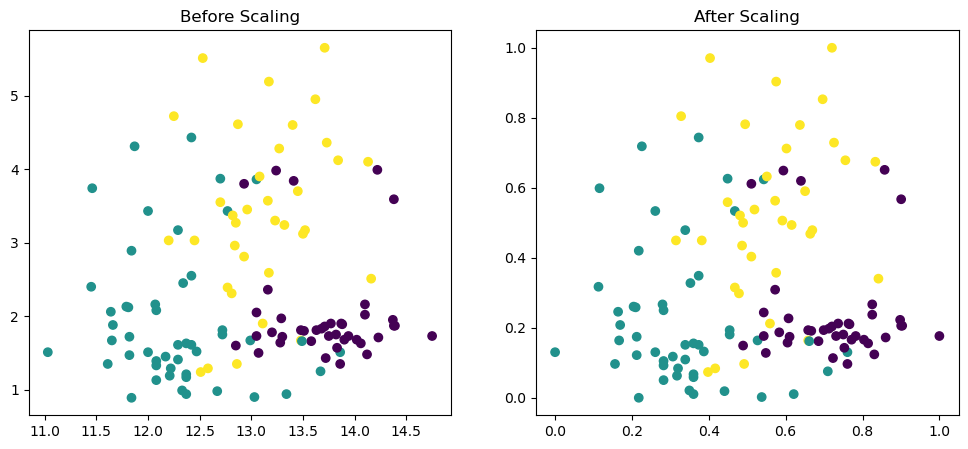

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

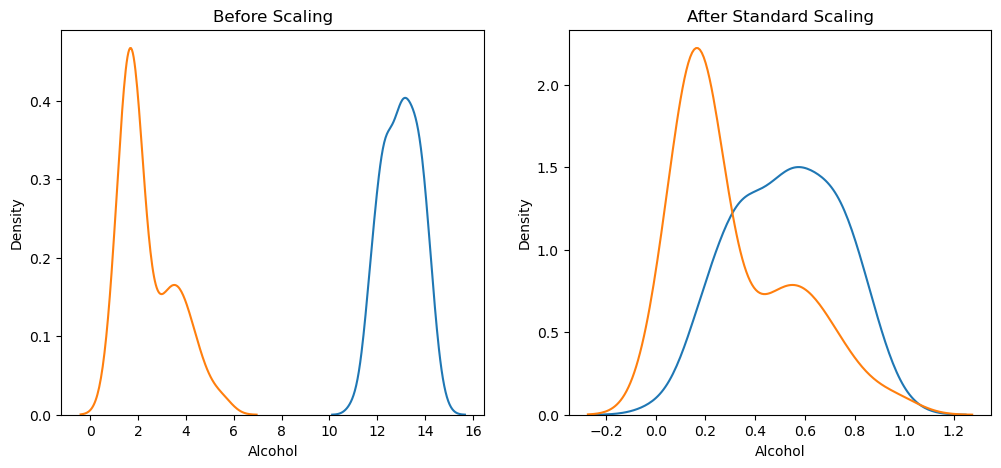

In [28]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()